In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def welch_t(a, b):
    """ Calculate the t statistic for two samples. """
    diff = a.mean() - b.mean()
    var = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    return diff/var

def welch_df(a, b):
    """ Calculate the effective degrees of freedom for two samples. """
    s_a, s_b = a.var(ddof=1), b.var(ddof=1)
    n_a, n_b = a.size, b.size
    numer = (s_a/n_a + s_b/n_b)**2
    denom = (s_a/ n_a)**2/(n_a - 1) + (s_b/ n_b)**2/(n_b - 1)
    return numer/denom

In [3]:
control = np.random.randn(8)*1.5 + 2
treatment = np.random.randn(12) + 3

df = welch_df(treatment, control)
t = welch_t(treatment, control)

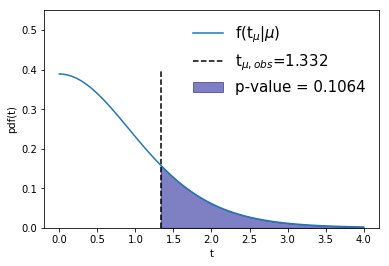

In [4]:
fig, ax = plt.subplots()
x = np.linspace(0, 4, 100)
t_dist = stats.t.pdf(x, df)
ft = ax.plot(x, t_dist, label=r'f(t$_\mu$|$\mu$)')
meas = ax.vlines(t, 0, 0.4, linestyles='--', color='k', 
          label= r't$_{\mu ,obs}$='+'{:.3f}'.format(t))
ax.set_ylabel('pdf(t)')
ax.set_xlabel('t')
ax.set_ylim(0, 0.55)
p = 1. - stats.t.cdf(t,df)
ax.fill_between(x, 0, t_dist, where=(x >= t), color='darkblue', alpha=0.5, label='p-value = {:.04f}'.format(p))
ax.legend(loc=1,fontsize=15, frameon=False)

In [5]:
plt.savefig("../docs/source/stats-fig03.png")